# TP Graphes et Optimisation
## FISA 4 Informatique / 2023-2024
### Alaaeddin ALMAJJO | Ayman DOULKOM | Pape THIAM

## Préambule 

Ce documment notebook `.ipynb` fait office de fichier `source` contenant les codes nécessaires à la réalisation du TP mais aussi cela fait office de rapport car contient les analyses et commentaires sur les algorithmes et résulats obtenus.
- Ce notebook se trouve dans le dossier `src`
- Ce dossier `src` contient :
    - le dossier `exos` qui contient les fichiers `.txt` à tester (récupérés depuis le moodle du cours de Graphes et Optimisation)
    - les fichiers de sorties générés par nos programmes python pour sauvegarder les après résolution des problèmes du plus court chemin et du voyageur de commerce
- Il y'a un auttre dossier `./../CPLEX` qui contient les dossiers CPLEX à ouvrir avec le logiciel CPLEX pour résoudre
    - le problème du plus court chemin dans le dossier `./../CPLEX/shortest-path`
    - le problème du voyageur de commerce dans le dossier `./../CPLEX/tsp`
- **Remarque 1:** Pour pouvoir exécuter et tester nos codes python, l'utilisation de `jupyter` de `anaconda` est fortement conseillé pour prévenir certains erreurs
- **Remarque 2:** Dans les cas où des graphes sont affichés et résolus dans la partie du plus court chemin, c'est le graphe du fichier `./exos/exo1.txt`

## 1. Plus court chemin

### 1.1. Construction du graphe 

La structure de données que nous avons choisie ici est une liste d'adjacence pour représenter le graphe non orienté. Dans cette structure, chaque sommet du graphe est représenté par une clé dans un dictionnaire, et la valeur associée à chaque clé est une liste des sommets adjacents à ce sommet.

Nous avons choisi cette structure de données car elle est efficace pour représenter les graphes non orientés, surtout lorsque le graphe est clairsemé (c'est-à-dire qu'il y a relativement peu d'arêtes par rapport au nombre de sommets). Elle permet un accès rapide aux voisins d'un sommet et facilite l'ajout et la suppression d'arêtes.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#Ajoute un sommet au graphe s'il n'existe pas déjà.
#Args: sommet : tuple représentant les coordonnées du sommet dans le réseau
def add_sommet(adjacency_list, sommet):
    if sommet not in adjacency_list:
        adjacency_list[sommet] = []

#Supprime un sommet et toutes les arêtes adjacentes du graphe représenté par la liste d'adjacence.
#Args:- adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
#     - sommet : tuple représentant les coordonnées du sommet à supprimer
#Cette fonction supprime le sommet de la liste d'adjacence et supprime toutes les arêtes adjacentes.
def remove_sommet(adjacency_list, sommet):
    if sommet in adjacency_list:
        del adjacency_list[sommet]
        for s, voisins in adjacency_list.items():
            if sommet in voisins:
                voisins.remove(sommet)

In [3]:

#Ajoute une arête entre deux sommets du graphe.
#Args:  - sommet1 : tuple représentant les coordonnées du premier sommet
#        - sommet2 : tuple représentant les coordonnées du deuxième sommet
#Cette fonction ajoute une arête entre sommet1 et sommet2 en ajoutant sommet2 à la liste d'adjacence
#de sommet1, et vice versa, s'ils ne sont pas déjà connectés.
def add_edge(adjacency_list, sommet1, sommet2):
    if sommet1 in adjacency_list and sommet2 in adjacency_list:
        if sommet2 not in adjacency_list[sommet1]:
            adjacency_list[sommet1].append(sommet2)
        if sommet1 not in adjacency_list[sommet2]:
            adjacency_list[sommet2].append(sommet1)


#Supprime une arête entre deux sommets du graphe représenté par la liste d'adjacence.
#Args:
#    - adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
#    - sommet1 : tuple représentant les coordonnées du premier sommet
#    - sommet2 : tuple représentant les coordonnées du deuxième sommet   
#Cette fonction supprime l'arête entre sommet1 et sommet2 en retirant sommet2 de la liste d'adjacence
#de sommet1, et vice versa, s'ils sont connectés.
def remove_edge(adjacency_list, sommet1, sommet2):
    if sommet1 in adjacency_list and sommet2 in adjacency_list:
        if sommet2 in adjacency_list[sommet1]:
            adjacency_list[sommet1].remove(sommet2)
        if sommet1 in adjacency_list[sommet2]:
            adjacency_list[sommet2].remove(sommet1)



In [4]:
"""
Renvoie la liste des sommets voisins d'un sommet donné dans le graphe représenté par la liste d'adjacence.
Args:
- adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
- sommet : tuple représentant les coordonnées du sommet
Returns:
- list : liste des sommets voisins du sommet donné
Cette fonction renvoie la liste des sommets voisins du sommet donné dans le graphe.
"""
def get_neighbors(adjacency_list, sommet):

    if sommet in adjacency_list:
        return adjacency_list[sommet]
    else:
        return []



"""
Renvoie le degré d'un sommet donné dans le graphe représenté par la liste d'adjacence.
Args:
- adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
- sommet : tuple représentant les coordonnées du sommet
Returns:
- int : degré du sommet
Cette fonction renvoie le nombre d'arêtes incidentes au sommet donné, c'est-à-dire le nombre de voisins du sommet.
"""
def get_degree(adjacency_list, sommet):
    if sommet in adjacency_list:
        return len(adjacency_list[sommet])
    else:
        return 0
    
"""
Vérifie si deux sommets sont adjacents dans le graphe représenté par la liste d'adjacence.
Args:
- adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
- sommet1 : tuple représentant les coordonnées du premier sommet
- sommet2 : tuple représentant les coordonnées du deuxième sommet
Returns:
- bool : True si les sommets sont adjacents, False sinon
Cette fonction vérifie si sommet2 est présent dans la liste d'adjacence de sommet1, et vice versa.
"""
def are_adjacent(adjacency_list, sommet1, sommet2):
    return sommet2 in adjacency_list.get(sommet1, []) and sommet1 in adjacency_list.get(sommet2, [])


"""
Vérifie si une arête existe entre deux sommets donnés dans le graphe représenté par la liste d'adjacence.
Args:
- adjacency_list : dictionnaire représentant la liste d'adjacence du graphe
- sommet1 : tuple représentant les coordonnées du premier sommet
- sommet2 : tuple représentant les coordonnées du deuxième sommet
Returns:
- bool : True si une arête existe entre les sommets, False sinon
Cette fonction vérifie si sommet2 est présent dans la liste d'adjacence de sommet1, ou vice versa.
"""
def edge_exists(adjacency_list, sommet1, sommet2):
    return sommet2 in adjacency_list.get(sommet1, []) or sommet1 in adjacency_list.get(sommet2, [])

In [9]:
"""
Calucule la distance euclidienne entre deux sommets
Args:
- sommet1 : tuple représentant les coordonnées du premier sommet
- sommet2 : tuple représentant les coordonnées du deuxième sommet
Returns:
- int : la distance calculée
"""
def calculate_distance(sommet1, sommet2):
    x1, y1 = sommet1
    x2, y2 = sommet2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

s1 = (0, 0) 
s2 = (5, 2)
d = calculate_distance(s1, s2)
#print(f"la distance entre s1:{s1} et s2:{s2} est {d}")

In [10]:
"""
Calucule la distance de manhattan entre deux sommets
Args:
- sommet1 : tuple représentant les coordonnées du premier sommet
- sommet2 : tuple représentant les coordonnées du deuxième sommet
Returns:
- int : la distance de manhatttan calculée
"""
def calculate_manhattan_distance(sommet1, sommet2):
    x1, y1 = sommet1
    x2, y2 = sommet2
    distance = abs(x2 - x1) + abs(y2 - y1)
    return distance

#sommet1 = (0, 0)
#sommet2 = (3, 4)
#distance_manhattan = calculate_manhattan_distance(sommet1, sommet2)
#print("La distance de Manhattan entre sommet1 et sommet2 est:", distance_manhattan)


In [11]:
#Crée le graphe à partir d'un fichier texte représentant le réseau.
#Args: - filename : nom du fichier texte contenant les informations sur le réseau
#Cette fonction lit les dimensions du réseau et les valeurs de chaque case à partir du fichier,
#puis ajoute les sommets et les arêtes correspondants au graphe en fonction des valeurs lues.
def create_graph_from_file(filename):
    adjacency_list = {}
    with open(filename, 'r') as file:
        dimensions = file.readline().split()
        n = int(dimensions[0])
        m = int(dimensions[1])
        grid = []
        for _ in range(n):
            row = list(map(int, file.readline().split()))
            grid.append(row)
    #print(grid)
    for i in range(n):
        for j in range(m):
            if grid[i][j] == 1 or grid[i][j] == 2 or grid[i][j] == 3:
                # Ajoute le sommet si la case est accessible (1, 2 ou 3)
                add_sommet(adjacency_list, (i, j))
                # Connecte le sommet aux sommets voisins s'ils sont également accessibles
                if i > 0 and (grid[i-1][j] == 1 or grid[i-1][j] == 2 or grid[i-1][j] == 3):
                    add_edge(adjacency_list, (i, j), (i-1, j))  # Connect to the above sommet
                if j > 0 and (grid[i][j-1] == 1 or grid[i][j-1] == 2 or grid[i][j-1] == 3):
                    add_edge(adjacency_list, (i, j), (i, j-1))  # Connect to the left sommet
                if i < n - 1 and (grid[i+1][j] == 1 or grid[i+1][j] == 2 or grid[i+1][j] == 3):
                    add_edge(adjacency_list, (i, j), (i+1, j))  # Connect to the below sommet
                if j < m - 1 and (grid[i][j+1] == 1 or grid[i][j+1] == 2 or grid[i][j+1] == 3):
                    add_edge(adjacency_list, (i, j), (i, j+1))  # Connect to the right sommet
                if i < n-1 and j < m-1 and (grid[i+1][j+1] == 1 or grid[i+1][j+1] == 2 or grid[i+1][j+1] == 3):
                    add_edge(adjacency_list, (i, j), (i+1, j+1))  # Connect to the above sommet
                if i > 0 and j > 0 and (grid[i-1][j-1] == 1 or grid[i-1][j-1] == 2 or grid[i-1][j-1] == 3):
                    add_edge(adjacency_list, (i, j), (i-1, j-1))  # Connect to the above sommet
                if i > 0 and j < m-1 and (grid[i-1][j+1] == 1 or grid[i-1][j+1] == 2 or grid[i-1][j+1] == 3):
                    add_edge(adjacency_list, (i, j), (i-1, j+1))  # Connect to the above sommet
                if i < n-1 and j > 0 and (grid[i+1][j-1] == 1 or grid[i+1][j-1] == 2 or grid[i+1][j-1] == 3):
                    add_edge(adjacency_list, (i, j), (i+1, j-1))  # Connect to the above sommet
                
    
    print("Le graphe a été créé avec succès à partir du fichier:", filename)
    #print(adjacency_list)
    return adjacency_list



In [13]:
#Dessine le graphe en utilisant matplotlib.
#Args:- graph : objet Graph contenant les informations sur le graphe
#Cette fonction dessine les sommets et les arêtes du graphe en utilisant matplotlib.
def plot_graph(adjacency_list):
    # Crée une nouvelle figure
    plt.figure(figsize=(8, 8))

    # Dessine les sommets
    for sommet in adjacency_list.keys():
        plt.plot(sommet[1], sommet[0], 'o', markersize=10, color='blue')  # Inverser les coordonnées x et y
    
    # Dessine les arêtes
    for sommet, voisins in adjacency_list.items():
        for voisin in voisins:
            plt.plot([sommet[1], voisin[1]], [sommet[0], voisin[0]], 'k-', linewidth=2)  # Inverser les coordonnées x et y
    
    # Définit les limites des axes
    plt.xlim(-1, max(max(coord[1] for coord in adjacency_list.keys()) + 1, 10))  # Ajoute un peu de marge à droite
    plt.ylim(-1, max(max(coord[0] for coord in adjacency_list.keys()) + 1, 10))  # Ajoute un peu de marge en bas
    
    # Ajoute des titres et étiquettes
    plt.title('Représentation du graphe')
    plt.xlabel('Colonne')
    plt.ylabel('Ligne')
    
    # Affiche le graphe
    plt.grid(True)
    plt.gca().invert_yaxis()  # Inverser l'axe y pour que le sommet (0,0) soit en bas à gauche
    plt.show()

    #plt.gca().invert_yaxis()  # Inverser l'axe y pour que le sommet (0,0) soit en bas à gauche
    #plt.show()


Le graphe a été créé avec succès à partir du fichier: exos/exo1.txt


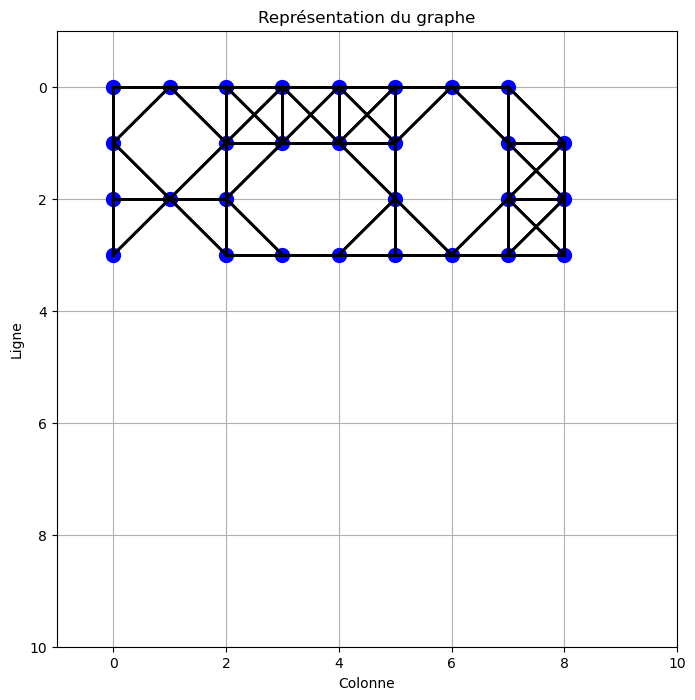

In [14]:
# Cellule 2 : Création du graphe à partir du fichier texte
adjacency_list = create_graph_from_file("exos/exo1.txt")
plot_graph(adjacency_list)

### 1.2 Modélisation  mathématique

### Modélisation du problème sous forme de programme linéaire

#### Variables de Décision :
- $x_{ij}$ : Variable binaire indiquant si l'arête reliant le sommet i au sommet j est incluse dans le chemin (1 si inclus, 0 sinon).

#### Fonction Objective :
Minimiser la somme des coûts des arêtes incluses dans le chemin :
$ \text{Min} \sum_{(i,j) \in E} c_{ij} \cdot x_{ij} $

#### Contraintes :
1. Contraintes de Flux :
   - Pour chaque sommet (sauf la source et la destination), le nombre d'arêtes entrantes est égal au nombre d'arêtes sortantes :
     $ \sum_{i} x_{ij} = \sum_{j} x_{ji} \quad \text{pour tout } j \neq s,t $
   - Pour la source, le nombre d'arêtes sortantes est égal à 1 :
     $ \sum_{j} x_{sj} = 1 $
   - Pour la destination, le nombre d'arêtes entrantes est égal à 1 :
     $ \sum_{i} x_{it} = 1 $

2. Contraintes de Sous-Cycles :
   - Pour éviter les sous-cycles, nous pouvons ajouter des contraintes de type inégalité triangulaire :
     $ d_{ik} \leq d_{ij} + d_{jk} \quad \text{pour tout } i,j,k $

### Implémentation en Utilisant CPLEX

Vous trouverez le projet *CPLEX* correspondant à la résolution du *problème du plus court chemin* dans le dossier **./../CPLEX/shortest-path**. Ainsi le 

**1.** Dans le fichier **shortest-path.mod**, il y'a la représentation du modèle. A ce niveau aussi, il y'a un bout de code qui permet d'exporter la solution après résolution dans un fichier **.txt**

<br>tuple edge
{
   key int o;
   key int d;
   float weight;
}

{edge} edges=...;

{int} nodes={i.o | i in edges} union {i.d | i in edges};
int st=...; // start (source)
int en=...; // end (destination)

dvar int obj; // distance
dvar boolean x[edges]; // do we use that edge ?

minimize obj;

subject to
{
obj==sum(e in edges) x[e]*e.weight;

forall(i in nodes)
    sum(e in edges:e.o==i) x[e]
    -sum(e in edges:e.d==i) x[e]    
    ==
    ((i==st)?1:((i==en)?(-1):0));
}

{edge} shortestPath={e | e in edges : x[e]==1};

execute
{
writeln(shortestPath);
var file = new IloOplOutputFile("../../src/solution_shortest_path.txt");
file.writeln(shortestPath);
file.close();
}

**2.** Il y'aura aussi un fichier **shortest-path.dat** qui va être généré par les fonctions qui suivent, afin d'avoir les données (sources, destination et edges) du graphe à résoudre.
<br> Exemple de contenu:
st = 2;
en = 27;
edges=
{
<1, 2, 1.0>,
<1, 9, 1.0>
};


In [34]:
# fonction permettant de faire une correspondance entre le numéro du sommet 
# dans le graphe et ses coordonnées correspondantes
# Exemple : 1 -> (0, 0)
def correspondence(graph):
    correspondence = {}  # Nouveau graphe avec les bonnes correspondances

    # Numérotation des sommets et création de la correspondance
    for i, sommet in enumerate(graph.keys(), start=1):
        correspondence[i] = sommet
    #print(correspondence)
    return correspondence

# fonction permettant de faire une correspondance inverse entre le numéro du sommet 
# dans le graphe et ses coordonnées correspondantes
# Args: - le sommet en coordonnées
#        - table de correspondence
# Exemple : (0, 0) -> 1
def correspondence_inv(sommet, correspondence):
    for key, value in correspondence.items():
        if value == sommet:
            return key

# permet de réorganiser un graphe, en utilisant les correspondance 
# des coordonnées d'un sommet par son numéro de dans le graphe 
def reorganize_graph(graph):
    correspondence_value = correspondence(graph)  # Dictionnaire pour la correspondance
    new_graph = {}  # Nouveau graphe avec les bonnes correspondances
    
    # Création du nouveau graphe avec les bonnes correspondances
    for sommet, voisins in graph.items():
        new_sommet = correspondence_inv(sommet, correspondence_value)
        new_voisins = [correspondence_inv(voisin, correspondence_value) for voisin in voisins]
        new_graph[new_sommet] = new_voisins

    return new_graph




# Exemple d'utilisation
graph_brut = {(0, 0): [(0, 1), (1, 0)], (0, 1): [(0, 0), (0, 2), (1, 0), (1, 2)], (0, 2): [(0, 1), (0, 3), (1, 2), (1, 3)], (0, 3): [(0, 2), (0, 4), (1, 2), (1, 3), (1, 4)], (0, 4): [(0, 3), (0, 5), (1, 3), (1, 4), (1, 5)], (0, 5): [(0, 4), (0, 6), (1, 4), (1, 5)], (0, 6): [(0, 5), (0, 7), (1, 5), (1, 7)], (0, 7): [(0, 6), (1, 7), (1, 8)], (1, 0): [(0, 0), (0, 1), (2, 0), (2, 1)], (1, 2): [(0, 2), (0, 1), (0, 3), (1, 3), (2, 1), (2, 2)], (1, 3): [(0, 3), (1, 2), (0, 2), (0, 4), (1, 4), (2, 2)], (1, 4): [(0, 4), (1, 3), (0, 3), (0, 5), (1, 5), (2, 5)], (1, 5): [(0, 5), (1, 4), (0, 4), (0, 6), (2, 5)], (1, 7): [(0, 7), (0, 6), (1, 8), (2, 7), (2, 8)], (1, 8): [(1, 7), (0, 7), (2, 7), (2, 8)], (2, 0): [(1, 0), (2, 1), (3, 0)], (2, 1): [(2, 0), (1, 0), (1, 2), (2, 2), (3, 0), (3, 2)], (2, 2): [(1, 2), (2, 1), (1, 3), (3, 2), (3, 3)], (2, 5): [(1, 5), (1, 4), (3, 4), (3, 5), (3, 6)], (2, 7): [(1, 7), (1, 8), (2, 8), (3, 6), (3, 7), (3, 8)], (2, 8): [(1, 8), (2, 7), (1, 7), (3, 7), (3, 8)], (3, 0): [(2, 0), (2, 1)], (3, 2): [(2, 2), (2, 1), (3, 3)], (3, 3): [(3, 2), (2, 2), (3, 4)], (3, 4): [(3, 3), (2, 5), (3, 5)], (3, 5): [(2, 5), (3, 4), (3, 6)], (3, 6): [(3, 5), (2, 5), (2, 7), (3, 7)], (3, 7): [(2, 7), (3, 6), (2, 8), (3, 8)], (3, 8): [(2, 8), (3, 7), (2, 7)]}
new_graph_net = reorganize_graph(graph_brut)
#print("Nouveau graphe avec les numéros sommets ... :")
#print(new_graph_net)

In [35]:
import math

# calcule les distances entre 2 sommets voisins
def calculate_distances(graph):
    distances = []
    
    for sommet, voisins in graph.items():
        for voisin in voisins:
            distance = math.sqrt((voisin[0] - sommet[0])**2 + (voisin[1] - sommet[1])**2)
            distances.append([sommet, voisin, distance])

    return distances

# permet de transformer un graph avec les distances (cout) en edges
# pour les préparer lors de la génération des données .dat sur cplex
def reorganize_graph_to_edges_for_cplex(graph_with_distances, correspondence_value):
    new_d = graph_with_distances
    for arete in new_d:
        for i in range(0, 2):
            arete[i] = correspondence_inv(arete[i], correspondence_value)
    return new_d
    
# Exemple d'utilisation
graph_test_with_distances = {(0, 0): [(0, 1), (1, 0)], (0, 1): [(0, 0), (0, 2), (1, 0), (1, 2)], (0, 2): [(0, 1), (0, 3), (1, 2), (1, 3)], (0, 3): [(0, 2), (0, 4), (1, 2), (1, 3), (1, 4)], (0, 4): [(0, 3), (0, 5), (1, 3), (1, 4), (1, 5)], (0, 5): [(0, 4), (0, 6), (1, 4), (1, 5)], (0, 6): [(0, 5), (0, 7), (1, 5), (1, 7)], (0, 7): [(0, 6), (1, 7), (1, 8)], (1, 0): [(0, 0), (0, 1), (2, 0), (2, 1)], (1, 2): [(0, 2), (0, 1), (0, 3), (1, 3), (2, 1), (2, 2)], (1, 3): [(0, 3), (1, 2), (0, 2), (0, 4), (1, 4), (2, 2)], (1, 4): [(0, 4), (1, 3), (0, 3), (0, 5), (1, 5), (2, 5)], (1, 5): [(0, 5), (1, 4), (0, 4), (0, 6), (2, 5)], (1, 7): [(0, 7), (0, 6), (1, 8), (2, 7), (2, 8)], (1, 8): [(1, 7), (0, 7), (2, 7), (2, 8)], (2, 0): [(1, 0), (2, 1), (3, 0)], (2, 1): [(2, 0), (1, 0), (1, 2), (2, 2), (3, 0), (3, 2)], (2, 2): [(1, 2), (2, 1), (1, 3), (3, 2), (3, 3)], (2, 5): [(1, 5), (1, 4), (3, 4), (3, 5), (3, 6)], (2, 7): [(1, 7), (1, 8), (2, 8), (3, 6), (3, 7), (3, 8)], (2, 8): [(1, 8), (2, 7), (1, 7), (3, 7), (3, 8)], (3, 0): [(2, 0), (2, 1)], (3, 2): [(2, 2), (2, 1), (3, 3)], (3, 3): [(3, 2), (2, 2), (3, 4)], (3, 4): [(3, 3), (2, 5), (3, 5)], (3, 5): [(2, 5), (3, 4), (3, 6)], (3, 6): [(3, 5), (2, 5), (2, 7), (3, 7)], (3, 7): [(2, 7), (3, 6), (2, 8), (3, 8)], (3, 8): [(2, 8), (3, 7), (2, 7)]}
distances_test = calculate_distances(graph_test_with_distance)
correspondence_value = correspondence(graph_test_with_distance)
#print("Edges à lire pour le .dat de CPLEX ...:")
#print(reorganize_graph_to_edges_for_cplex(distances_test, correspondence_value))

In [61]:
#Récupère la source du graphe depuis le fichier
def get_source_graph_from_file(filename):
    with open(filename, 'r') as file:
        dimensions = file.readline().split()
        n = int(dimensions[0])
        m = int(dimensions[1])
        grid = []
        for _ in range(n):
            row = list(map(int, file.readline().split()))
            grid.append(row)
    for i in range(n):
        for j in range(m):
            if grid[i][j] == 2:
                return (i, j)


#Récupére la destination du graphe depuis le fichier
def get_destination_graph_from_file(filename):
    with open(filename, 'r') as file:
        dimensions = file.readline().split()
        n = int(dimensions[0])
        m = int(dimensions[1])
        grid = []
        for _ in range(n):
            row = list(map(int, file.readline().split()))
            grid.append(row)
    for i in range(n):
        for j in range(m):
            if grid[i][j] == 3:
                return (i, j)
                

# test des fonctions
source = get_source_graph_from_file('./exos/exo1.txt')
destination = get_destination_graph_from_file('./exos/exo1.txt')
#print("Source et destination du graphe './exos/exo1.txt' ... :")
print(f"source: {source}")
print(f"destination: {destination}")

source: (0, 1)
destination: (3, 6)


In [54]:
from datetime import datetime

def generate_dat_file(source, destination, distances, filename):
    with open(filename, 'w') as file:
        file.write("/*********************************************\n")
        file.write(" * OPL 22.1.1.0 Data\n")
        file.write(" * Author: papemayeldiagnethiam\n")
        file.write(f" * Creation Date: {datetime.now()}\n")
        file.write(" *********************************************/\n\n")
        file.write(f"st = {source};\n")
        file.write(f"en = {destination};\n\n")
        file.write("edges=\n{\n")
        for edge in distances:
            file.write("<{}, {}, {}>,\n".format(edge[0], edge[1], edge[2]))
        file.write("};\n")

# Exemple d'utilisation
filename_to_gen_for_cplex = "../CPLEX/shortest-path/shortest-path.dat"
filename_graph_to_solve = "exos/exo1.txt"
adjacency_list_graph = create_graph_from_file(filename_graph_to_solve)
correspondence_value = correspondence(adjacency_list_graph) 

source_graph = correspondence_inv(get_source_graph_from_file(filename_graph_to_solve), correspondence_value)
destination_graph = correspondence_inv(get_destination_graph_from_file(filename_graph_to_solve), correspondence_value)

distances_test_graph = calculate_distances(adjacency_list_graph)
#print(distances_test_graph)
correspondence_value = correspondence(adjacency_list_graph)
graph_edges_cplex = reorganize_graph_to_edges_for_cplex(distances_test_graph, correspondence_value)
#print(graph_edges_cplex)
generate_dat_file(source_graph, destination_graph, graph_edges_cplex, filename_to_gen_for_cplex)
print("Fichier", filename_to_gen_for_cplex, "généré avec succès.")

Le graphe a été créé avec succès à partir du fichier: exos/exo1.txt
Fichier ../CPLEX/shortest-path/shortest-path.dat généré avec succès.


### Après cette étapes, il faut ouvrit le dossier **./../CPEX/shortest-path** avec CPLEX et lancer la résolution.
### Ensuite, après exécution et résolution, un fichier **./solution_shortest_path.txt** contient la solution

In [50]:
# permet de lire et d'extraire le fichier contenant la soluction du plus court chemin
def read_edges_solution_from_file(filename):
    edges = []
    with open(filename, 'r') as file:
        content = file.read()
        # Supprimer les caractères spéciaux et les espaces
        content = content.replace('{', '').replace('}', '').replace('<', '').replace('>', '').replace('\n', '')
        # Séparer les entrées par des espaces
        entries = content.split()
        # print(entries)
        for i in range (0, len(entries), 3):
            triplet = []
            triplet.append(int(entries[i]))
            triplet.append(int(entries[i+1]))
            triplet.append(int(entries[i+2]))
            edges.append(triplet)    
    return edges


# Exemple d'utilisation
filename = "solution_shortest_path.txt"
edges = read_edges_solution_from_file(filename)
print("Solution après résolution avec CPLEX")
print(edges)


Solution après résolution avec CPLEX
[[2, 3, 1], [3, 4, 1], [4, 5, 1], [5, 12, 1], [12, 13, 1], [13, 19, 1], [19, 26, 1], [26, 27, 1]]


In [42]:
import matplotlib.pyplot as plt

# permet de tracer le chemin d'un ensemble de points passés en paramètres
def plot_path(path):
    # Crée une nouvelle figure
    plt.figure(figsize=(8, 8))
    
    # Extraire les coordonnées x et y du chemin
    x = [p[0] for p in path]
    y = [p[1] for p in path]

    # Tracer le chemin
    plt.plot(y, x, 'o', markersize=10, color='blue', linestyle="-")

    # Définit les limites des axes
    plt.xlim(-1, max(max(coord[1] for coord in adjacency_list.keys()) + 1, 10))  # Ajoute un peu de marge à droite
    plt.ylim(-1, max(max(coord[0] for coord in adjacency_list.keys()) + 1, 10))  # Ajoute un peu de marge en bas

    # Ajoute des titres et étiquettes
    plt.title('Représentation du plus court chemin')
    plt.xlabel('Colonne')
    plt.ylabel('Ligne')
    
    # Affiche le graphe
    plt.grid(True)
    plt.gca().invert_yaxis()  # Inverser l'axe y pour que le sommet (0,0) soit en bas à gauche
    plt.show()

# Exemple d'utilisation
#path = [(0, 0), (0, 1), (4, 0)]
#plot_path(path)


Solution du graphe sauvegardée avec succès sol_exo1.txt ...


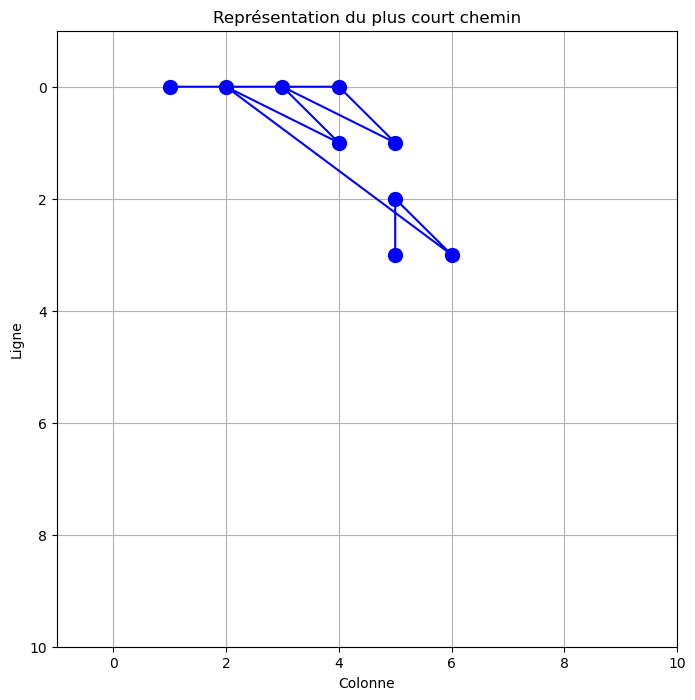

In [52]:
def shortest_path_solved_from_cplex(correspondence_value, filename_sol_cplex, filename_sol_save):
    total_cost = 0
    shortest_path = []
    edges = read_edges_solution_from_file(filename)
    for key, value in correspondence_value.items():
        for edge in edges:
            if key == edge[0]:
                shortest_path.append(value)
            if key == edge[1]:
                shortest_path.append(value)
    for edge in edges:
        total_cost += edge[2]
    path_out = list(set(shortest_path))
    with open(filename_sol_save, 'w') as file:
        file.write(f"{total_cost}\n")
        file.write(f"{path_out}\n")    
    file.close()

    print(f"Solution du graphe sauvegardée avec succès {filename_sol_save} ...")
    #print(total_cost)
    #print(path_out)

    return path_out

shortest_path = shortest_path_solved_from_cplex(correspondence_value, 'solution_shortest_path.txt', 'sol_exo1.txt')
plot_path(shortest_path)
    

### 1.3  Algorithme de cheminement

Le graphe a été créé avec succès à partir du fichier: exos/exo1.txt


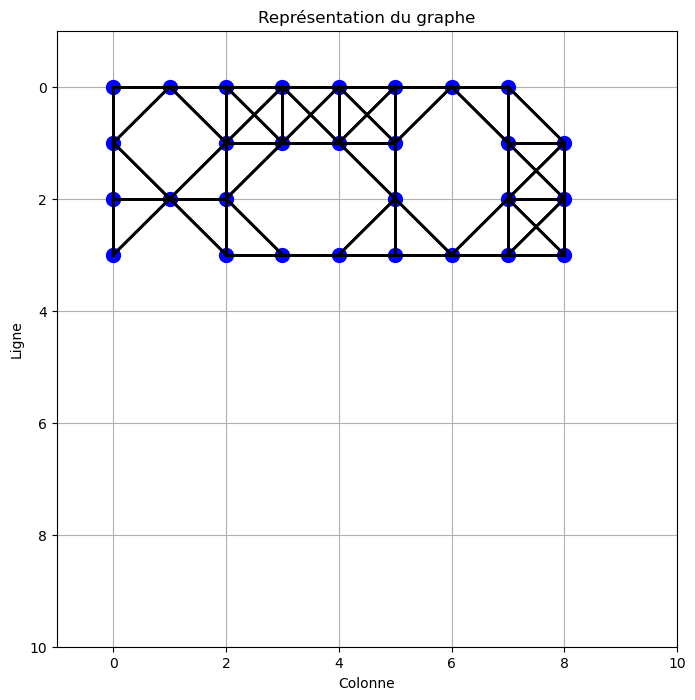

Plus court chemin
[(0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (3, 6)]


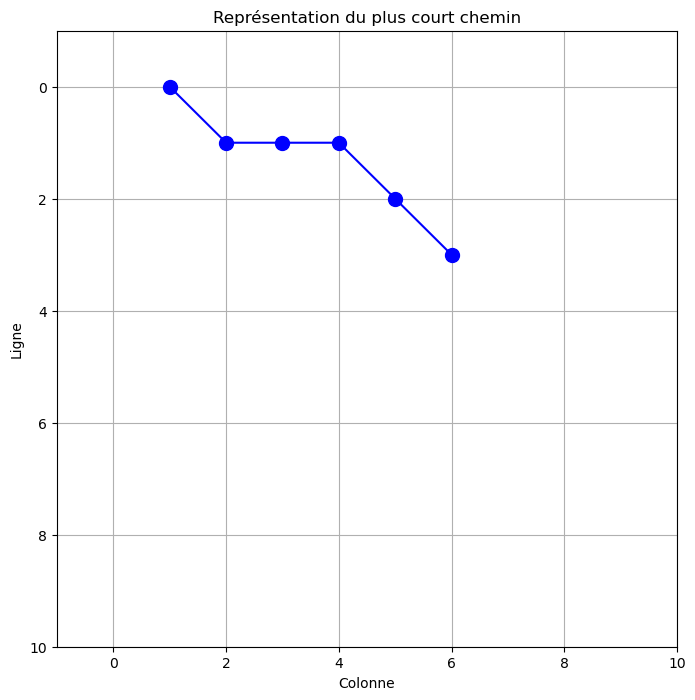

In [62]:
import math

def heuristic(node, goal):
    # Distance euclidienne entre deux sommets
    return math.sqrt((goal[0] - node[0]) ** 2 + (goal[1] - node[1]) ** 2)

def A_star(start, goal, graph):
    openSet = {start}
    cameFrom = {}
    gScore = {node: float('inf') for node in graph}
    gScore[start] = 0
    fScore = {node: float('inf') for node in graph}
    fScore[start] = heuristic(start, goal)

    while openSet:
        current = min(openSet, key=lambda node: fScore[node])
        if current == goal:
            path = [current]
            while current in cameFrom:
                current = cameFrom[current]
                path.append(current)
            path.reverse()
            return path

        openSet.remove(current)
        for neighbor in graph[current]:
            tentative_gScore = gScore[current] + 1  # Assuming each edge has weight 1
            if tentative_gScore < gScore[neighbor]:
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = tentative_gScore + heuristic(neighbor, goal)
                openSet.add(neighbor)

    return None

# Exemple d'utilisation
graph = {
    (0, 0): [(0, 1), (1, 0)],
    (0, 1): [(0, 0), (0, 2)],
    (0, 2): [(0, 1), (1, 2)],
    (1, 0): [(0, 0), (1, 1)],
    (1, 1): [(1, 0), (1, 2)],
    (1, 2): [(0, 2), (1, 1)]
}
adjacency_list_graph_for_A_star = create_graph_from_file("exos/exo1.txt")
#print(adjacency_list)
plot_graph(adjacency_list)
start = (0, 1)
goal = (3, 6)
path = A_star(source, destination, adjacency_list_graph_for_A_star)
print("Plus court chemin")
print(path)
plot_path(path)


### Comparaison et commentaire de l'algorithme A* dans le cas où $ h(x) = 0 $ 
L'algorithme A* est une méthode de recherche de chemin dans un graphe qui utilise une fonction d'évaluation pour guider la recherche vers la solution optimale. Dans le cas où la fonction d'heuristique h(x) est nulle, cela signifie que l'algorithme se comporte essentiellement comme Dijkstra, cherchant à minimiser la distance parcourue du départ à chaque nœud.

Voici une comparaison de l'algorithme A* avec une fonction d'heuristique nulle ($ h(x) = 0 $) et avec la distance euclidienne comme heuristique sur différents réseaux :

1. Cas où $ h(x) $ = 0 :
   - L'algorithme $ A* $ se comporte comme Dijkstra, explorant tous les nœuds dans un ordre qui minimise la distance parcourue depuis le nœud de départ.
   - Dans les réseaux de petite taille avec une topologie simple, $ A* $ avec $ h(x) = 0 $ trouve rapidement le chemin optimal car il explore systématiquement toutes les possibilités.
   - Cependant, dans les réseaux plus grands ou plus complexes, l'algorithme peut devenir très lent car il examine tous les chemins possibles, ce qui peut être inefficace.

2. Cas où $ h(x) $ est la distance euclidienne :
   - L'utilisation de la distance euclidienne comme heuristique permet à l'algorithme de guider la recherche vers la destination de manière plus intelligente, en favorisant les chemins qui semblent plus prometteurs en termes de distance euclidienne restante.
   - Dans les réseaux avec une disposition spatiale des nœuds (comme des cartes), l'algorithme $ A* $ avec la distance euclidienne comme heuristique peut converger plus rapidement vers la solution optimale, car il explore d'abord les chemins qui semblent se rapprocher de la destination.
   - Cependant, cela ne garantit pas toujours le chemin le plus court, car la présence d'obstacles ou d'autres contraintes peut rendre certains chemins plus longs dans la réalité.

En gros, l'utilisation d'une fonction d'heuristique appropriée dans l'algorithme  $ A* $ peut significativement accélérer la recherche de chemin dans des réseaux de grande taille ou complexes, en guidant la recherche vers les zones prometteuses du graphe.

### Comparaison entre les solutions obtenues entre $ CPLEX $ et $ A* $
Pour comparer les temps de calcul et les solutions obtenues en utilisant le modèle mathématique avec $ CPLEX $ et l'algorithme de cheminement $ A* $, voici quelques considérations :

1. Temps de calcul :
   - Avec $ CPLEX $ : Le temps de calcul dépendra de la taille du graphe et de la complexité du problème. $ CPLEX $ utilise des techniques d'optimisation sophistiquées mais peut être lent pour des problèmes très volumineux.
   - Avec l'algorithme $ A* $ : Le temps de calcul dépend également de la taille du graphe, mais il peut être plus rapide pour des problèmes de taille modérée à grande. Cependant, il peut être moins efficace pour des problèmes très complexes en raison de la nature heuristique de l'algorithme.

2. Solutions obtenues :
   - Avec $ CPLEX $ : Le modèle mathématique résolu par $ CPLEX $ garantit une solution optimale au problème du voyageur de commerce. Cependant, cela peut prendre du temps pour obtenir cette solution optimale, surtout pour des problèmes de grande taille.
   - Avec l'algorithme  $ A* $ : L'algorithme A* fournit une solution approchée au problème, mais il n'offre pas de garantie d'optimalité. La qualité de la solution dépend de la fonction d'heuristique utilisée et de la manière dont elle guide la recherche. Dans certains cas, l'algorithme peut trouver une solution très proche de l'optimum, mais dans d'autres cas, il peut ne pas être aussi efficace.

En conclusion, l'utilisation de $ CPLEX $ garantit une solution optimale mais peut prendre plus de temps, tandis que l'algorithme $ A* $ peut fournir une solution plus rapidement mais avec une garantie d'optimalité limitée. Le choix entre les deux dépendra des exigences de précision de la solution et des contraintes de temps de calcul. Si la précision est primordiale et que le temps de calcul n'est pas un problème, $ CPLEX $ est préférable. Si une solution rapide est nécessaire et que l'optimalité peut être sacrifiée, l'algorithme $ A* $ peut être une meilleure option.

## 2. Problème du voyageur de commerce

In [9]:
# permet de récupérer un graphe depuis un fichier
def read_graph_from_file(filename):
    graph = {}
    with open(filename, 'r') as file:
        num_vertices, num_edges = map(int, file.readline().split())
        for _ in range(num_edges):
            v1, v2, cost = map(int, file.readline().split())
            if v1 not in graph:
                graph[v1] = {}
            if v2 not in graph:
                graph[v2] = {}
            graph[v1][v2] = cost
            graph[v2][v1] = cost  # Ajouter pour un graphe non orienté
    return graph


# Test de la fonction
filename = "./exos/test_voyageur_commerce.txt"  # Nom du fichier à lire
graph = read_graph_from_file(filename)
print(graph)


{0: {1: 10, 2: 15, 3: 20}, 1: {0: 10, 2: 35, 3: 25, 4: 30}, 2: {0: 15, 1: 35, 3: 30, 4: 25}, 3: {0: 20, 1: 25, 2: 30, 4: 40}, 4: {1: 30, 2: 25, 3: 40, 5: 10}, 5: {4: 10}}



### Modélisation du TSP (Problème du Voyageur de Commerce) sous forme de programme linéaire 
Nous devons formuler le problème du voyageur de commerce sous forme d'un programme linéaire en nombres entiers pour résoudre le problème avec CPLEX. Voici comment nous pourrions le faire :

1. **Variables de décision :** Soit $ x_{ij} $ une variable binaire indiquant si l'arête $ (i, j) $ est utilisée dans le cycle hamiltonien. Soit $ u_i $ une variable continue indiquant la position du sommet $ i $ dans le cycle.

2. **Fonction objectif :** Minimiser la somme des coûts des arêtes utilisées, c'est-à-dire $ \sum_{(i,j) \in A} d_{ij} \cdot x_{ij} $.

3. **Contraintes :**
   - Chaque sommet doit être visité exactement une fois : $ \sum_{j \neq i} x_{ij} = 1 $ pour tout $ i $.
   - Aucun sous-cycle ne doit être présent : $ u_i - u_j + 1 \leq (n-1) \cdot (1 - x_{ij}) $ pour tout $ i $ et $ j $ différents et non consécutifs.
   - Les valeurs des variables $ u_i $ doivent former un ordre cohérent : $ 2 \leq u_i \leq n $ et $ u_1 = 1 $.

Une fois que nous avons formulé le problème, nous pouvons implémenter et résoudre ce modèle mathématique avec CPLEX sur de petits graphes générés aléatoirement. Nous pourrions ensuite tester notre implémentation sur ces graphes et analyser les résultats observés.

### Résolution du problème de voyageur de commerce par CPLEX en utilisant :
- le logiciel CPLEX, en ouvrant le dossier **./../CPLEX/tsp** accompagne le projet
- les API CPLEX (module) sur python dont le code est le suivant

In [ ]:
from docplex.mp.model import Model

# Résolution du problème de voyageur de commerce par cplex en utilisant le module python
def solve_tsp(graph):
    # Créer le modèle
    model = Model('TSP')
    
    # Variables de décision
    x = {}
    for i in graph.keys():
        for j in graph.keys():
            if i != j:
                x[i, j] = model.binary_var(name='x_{0}_{1}'.format(i, j))
    
    # Contraintes
    # Chaque ville doit être visitée exactement une fois
    for i in graph.keys():
        model.add_constraint(model.sum(x[i, j] for j in graph.keys() if i != j) == 1, 
                             ctname='visit_once_{0}'.format(i))
    # Sous-tour élimination
    for i in graph.keys():
        for j in graph.keys():
            if i != j:
                model.add_indicator(x[i, j], x[j, i], 1, name='subtour_elim_{0}_{1}'.format(i, j))
    
    # Objectif : minimiser la somme des coûts des arêtes
    objective = model.sum(graph[i][j] * x[i, j] for i in graph.keys() for j in graph.keys() if i != j)
    model.minimize(objective)
    
    # Résoudre le modèle
    model.solve()
    
    # Récupérer la solution
    solution = [(i, j) for i in graph.keys() for j in graph.keys() if i != j and x[i, j].solution_value == 1]
    
    return solution

# Exemple d'utilisation
graph = {
    'A': {'B': 10, 'C': 15, 'D': 20},
    'B': {'A': 10, 'C': 35, 'D': 25},
    'C': {'A': 15, 'B': 35, 'D': 30},
    'D': {'A': 20, 'B': 25, 'C': 30}
}

solution = solve_tsp(graph)
print(solution)

In [11]:
import random

# genere de manière aléatoire un graphe en se basant sur la méthode proposée par Erdös-Rényi,
def generate_random_graph(n, p):
    graph = {}
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                cost = random.randint(10, 50)
                if i not in graph:
                    graph[i] = {}
                if j not in graph:
                    graph[j] = {}
                graph[i][j] = cost
                graph[j][i] = cost  # Si le graphe est non orienté
    return graph

# Test
n = 5  # Nombre de sommets
p = 0.5  # Probabilité d'avoir une arête entre deux sommets
random_graph = generate_random_graph(n, p)
print(random_graph)


{0: {1: 23, 4: 15}, 1: {0: 23, 2: 18, 3: 26, 4: 46}, 4: {0: 15, 1: 46}, 2: {1: 18, 3: 20}, 3: {1: 26, 2: 20}}


### Résolution du problème du voyageur de commerce par la méthode d'énumération

In [13]:
import itertools

# permet de résoudre par la méthode d'énumération
# le problème du voyageur de commerce
# Args : - graph
def traveling_salesman_enumeration(graph):
    min_cost = float('inf')
    min_path = None
    
    # Générer toutes les permutations des villes
    cities = list(graph.keys())
    permutations = itertools.permutations(cities)
    
    # Parcourir chaque permutation
    for path in permutations:
        # Vérifier si le chemin est déjà invalide
        if any(path[i] not in graph[path[i-1]] for i in range(1, len(path))):
            continue
        
        # Calculer le coût total du chemin
        total_cost = sum(graph[path[i-1]][path[i]] for i in range(1, len(path)))
        
        # Vérifier si le coût total est le plus bas trouvé jusqu'à présent
        if total_cost < min_cost:
            min_cost = total_cost
            min_path = path
    
    return min_path, min_cost


# Test
graph = {
    'A': {'B': 10, 'C': 15, 'D': 20},
    'B': {'A': 10, 'C': 35, 'D': 25},
    'C': {'A': 15, 'B': 35, 'D': 30},
    'D': {'A': 20, 'B': 25, 'C': 30}
}
random_graph = generate_random_graph(n, p)
min_path, min_cost = traveling_salesman_enumeration(random_graph)
print("Graph généré aléatoirement", random_graph)
print("Chemin optimal:", min_path)
print("Coût total:", min_cost)


Graph généré aléatoirement {0: {1: 32}, 1: {0: 32, 3: 39}, 3: {1: 39, 2: 30, 4: 12}, 2: {3: 30, 4: 37}, 4: {2: 37, 3: 12}}
Chemin optimal: (0, 1, 3, 4, 2)
Coût total: 120


### Analyse et commentaire des résultats observé par la résolution du problème du voyageur de commerce

L'analyse et le commentaire des résultats obtenus par la résolution du problème du voyageur de commerce par CPLEX et par la méthode d'énumération peuvent fournir des informations précieuses sur les performances et les limites de chaque approche.

1. Résolution par CPLEX :
   - Avantages :
     - Garantie d'optimalité : CPLEX fournit une solution optimale au problème du voyageur de commerce, ce qui signifie que la solution trouvée est la meilleure possible.
     - Efficacité pour les problèmes de taille modérée à grande : CPLEX est capable de gérer des problèmes complexes avec un grand nombre de villes et d'arêtes, tout en trouvant rapidement une solution optimale dans de nombreux cas.
   - Limitations :
     - Temps de calcul : Pour des problèmes très volumineux, le temps de calcul peut être prohibitif. Cela peut être dû à la complexité intrinsèque du problème du voyageur de commerce ainsi qu'à la méthode de résolution utilisée par CPLEX.
     - Ressources informatiques : La résolution de grands problèmes peut nécessiter des ressources informatiques importantes, notamment de la mémoire et de la puissance de calcul.

2. Résolution par méthode d'énumération :
   - Avantages :
     - Simplicité : L'algorithme d'énumération est relativement simple à implémenter et à comprendre. Il ne nécessite pas de bibliothèques externes et peut être mis en œuvre avec des connaissances de base en programmation.
     - Compréhension du problème : L'algorithme d'énumération peut aider à mieux comprendre la structure du problème du voyageur de commerce et des solutions possibles.
   - Limitations :
     - Coût computationnel : L'algorithme d'énumération est généralement peu efficace pour les problèmes de taille significative. Le nombre de permutations à évaluer peut croître de manière exponentielle avec la taille du graphe, ce qui le rend impraticable pour de grands ensembles de données.
     - Optimisation limitée : L'algorithme d'énumération ne garantit pas une solution optimale, surtout pour les problèmes de grande taille. De plus, il peut être imprécis et impraticable pour des problèmes complexes.
